In [1]:
# Path for testing dataset
test_image_dir = "C:/Users/kaush/Downloads/lips/lips/testing"

# Function to preprocess test images
def load_and_preprocess_test_data(image_dir, class_names, img_size=(224, 224)):
    test_images = []
    test_labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                try:
                    # Load and preprocess image
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
                    img = tf.keras.preprocessing.image.img_to_array(img)
                    img = img / 255.0  # Normalize
                    test_images.append(img)
                    test_labels.append(class_names.index(class_name))
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    test_images = np.array(test_images)
    test_labels = np.array(test_labels)
    return test_images, test_labels

# Load and preprocess testing data
test_images, test_labels = load_and_preprocess_test_data(test_image_dir, class_names)

# Debug: Check loaded test data
print(f"Number of test images: {len(test_images)}")
print(f"Number of test labels: {len(test_labels)}")

# Ensure data is loaded correctly
if len(test_images) > 0:
    plt.imshow(test_images[0])
    plt.title(f"Test Label: {class_names[test_labels[0]]}")
    plt.show()
else:
    print("No test images were loaded. Please check the test data path.")

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions on test data
test_preds = np.argmax(model.predict(test_images), axis=1)

# Calculate metrics
print("\nClassification Report:")
report = classification_report(test_labels, test_preds, target_names=class_names)
print(report)

# Confusion matrix
cm = confusion_matrix(test_labels, test_preds)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Data)")
plt.show()


NameError: name 'class_names' is not defined

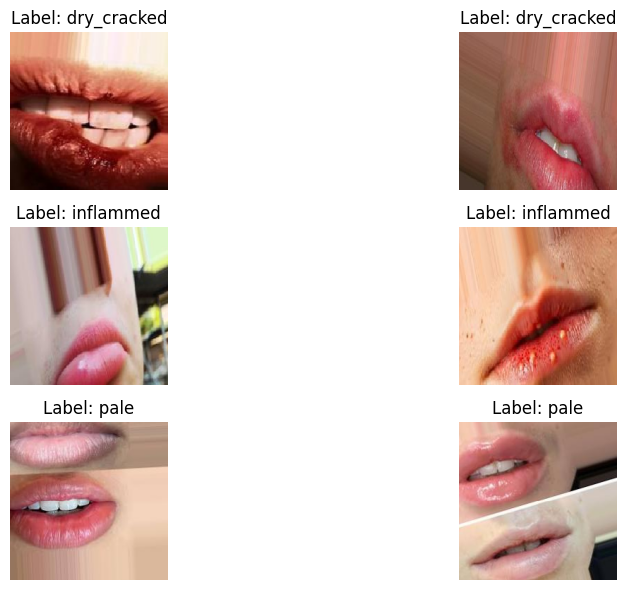

In [11]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Path to the augmented training directory
image_dir = r"C:\Users\kaush\Downloads\lips\lips\augmented_train"

# Load and preprocess the images
def load_images_from_directory(image_dir, class_names, img_size=(224, 224)):
    images = []
    labels = []
    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(image_dir, class_name)
        if not os.path.exists(class_folder):
            print(f"Directory not found: {class_folder}")
            continue

        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
                    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize
                    images.append(img)
                    labels.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels)

# Load the data
images, labels = load_images_from_directory(image_dir, class_names)

# Display 2 sample images from each class
def display_sample_images(images, labels, class_names, num_samples=2):
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(12, 6))

    for i, class_name in enumerate(class_names):
        class_indices = np.where(labels == i)[0]
        sample_indices = class_indices[:num_samples]

        for j, idx in enumerate(sample_indices):
            ax = axes[i, j] if len(class_names) > 1 else axes[j]
            ax.imshow(images[idx])
            ax.set_title(f"Label: {class_names[labels[idx]]}")
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Check if images and labels are loaded successfully
if len(images) > 0 and len(labels) > 0:
    display_sample_images(images, labels, class_names, num_samples=2)
else:
    print("No images were loaded. Please check the directory path and data.")


No class name found in XML: C:/Users/kaush/Downloads/lips/lips/annotation\inflammed\aug_0_9098.xml
Skipping aug_0_9098.jpg due to missing class label.
Number of images: 596
Number of labels: 596


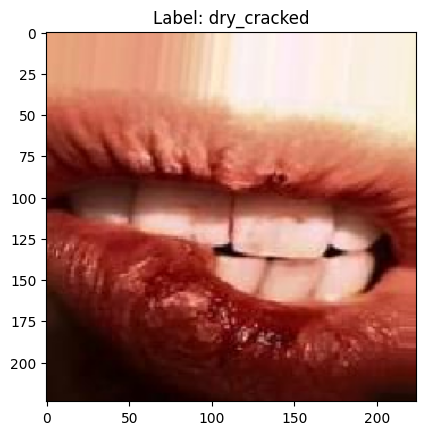

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 722ms/step - accuracy: 0.4263 - loss: 1.3582 - val_accuracy: 0.0111 - val_loss: 2.0475
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 642ms/step - accuracy: 0.4061 - loss: 1.2751 - val_accuracy: 0.2000 - val_loss: 1.4499
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 642ms/step - accuracy: 0.4267 - loss: 1.1660 - val_accuracy: 0.2556 - val_loss: 1.3535
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 640ms/step - accuracy: 0.5162 - loss: 1.0005 - val_accuracy: 0.2889 - val_loss: 1.3484
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.5409 - loss: 0.9414 - val_accuracy: 0.2111 - val_loss: 1.3853
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 643ms/step - accuracy: 0.5891 - loss: 0.8700 - val_accuracy: 0.3778 - val_loss: 1.2318
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 680ms/step - accuracy: 0.6518 - loss: 0.8092 - val_accuracy: 0.5111 - val_loss: 1.0558
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 677ms/step - accuracy: 0.6286 - loss: 0.7976 - val_accu

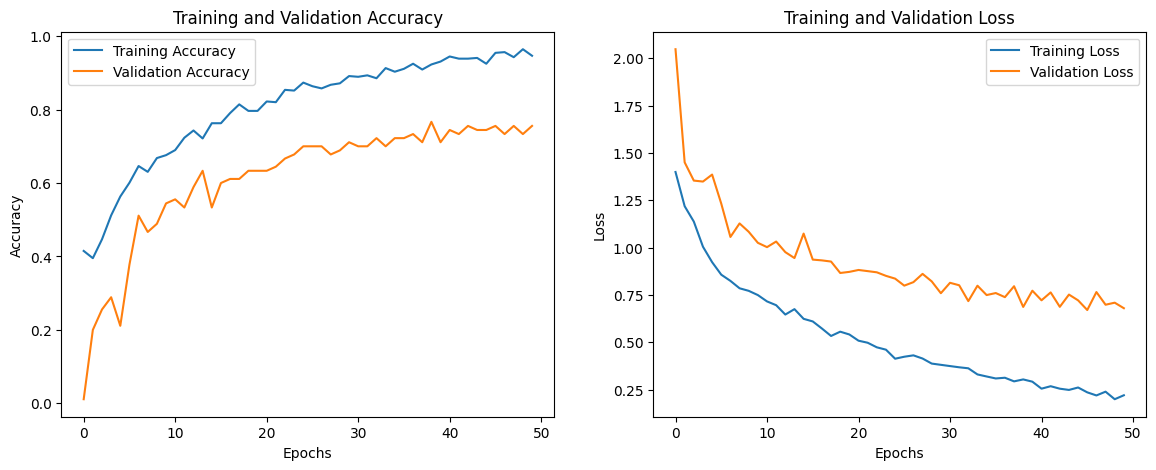

19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 556ms/step
              precision    recall  f1-score   support

 dry_cracked       0.94      1.00      0.97       198
   inflammed       0.94      0.99      0.97       198
        pale       0.99      0.89      0.94       200

    accuracy                           0.96       596
   macro avg       0.96      0.96      0.96       596
weighted avg       0.96      0.96      0.96       596



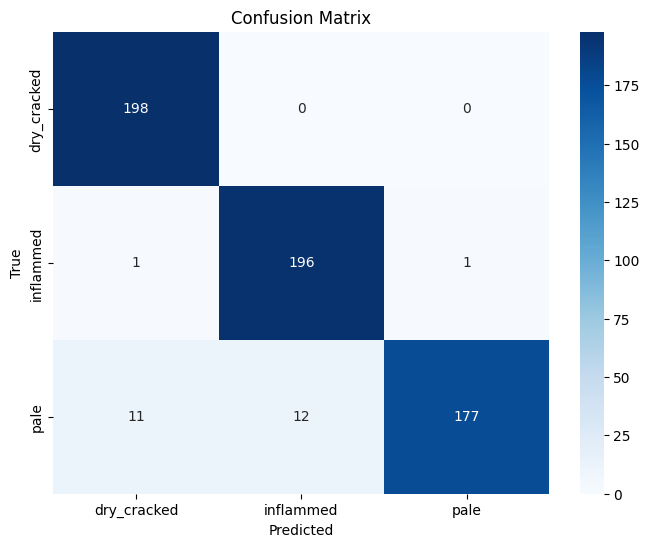

In [2]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Parse XML to get class labels
def parse_xml(xml_file):
    try:
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for obj in root.findall('object'):
            class_name = obj.find('name').text
            if class_name:
                return class_name
        print(f"No class name found in XML: {xml_file}")
        return None
    except Exception as e:
        print(f"Error parsing XML {xml_file}: {e}")
        return None

# Load images and corresponding labels
def load_data(image_dir, xml_dir, class_names):
    images = []
    labels = []
    for class_name in class_names:
        class_folder = os.path.join(image_dir, class_name)
        xml_folder = os.path.join(xml_dir, class_name)
        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                xml_file = os.path.join(xml_folder, img_file.replace(".jpg", ".xml"))
                class_label = parse_xml(xml_file)

                if class_label is None:
                    print(f"Skipping {img_file} due to missing class label.")
                    continue

                if class_label in class_names:
                    images.append(img_path)
                    labels.append(class_names.index(class_label))
                else:
                    print(f"Warning: {class_label} is not a valid class.")
    return images, labels

# Preprocess images
def preprocess_images(image_paths, labels, img_size=(224, 224)):
    images = []
    for img_path in image_paths:
        try:
            if not os.path.exists(img_path):
                print(f"Warning: Image path does not exist: {img_path}")
                continue

            img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
            img = tf.keras.preprocessing.image.img_to_array(img)

            if np.all(img == 0):
                print(f"Warning: Image {img_path} is filled with zeros after conversion.")
                continue
            
            images.append(img)
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
    
    images = np.array(images) / 255.0  # Normalize
    labels = np.array(labels)
    return images, labels

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Directories for images and annotations
image_dir = "C:/Users/kaush/Downloads/lips/lips/augmented_train"
xml_dir = "C:/Users/kaush/Downloads/lips/lips/annotation"

# Load and preprocess the data
image_paths, labels = load_data(image_dir, xml_dir, class_names)
print(f"Number of images: {len(image_paths)}")
print(f"Number of labels: {len(labels)}")
images, labels = preprocess_images(image_paths, labels)

# Display a sample image
if len(images) > 0:
    plt.imshow(images[0])
    plt.title(f"Label: {class_names[labels[0]]}")
    plt.show()
else:
    print("No images were loaded. Please check the image paths and data.")

# Load MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(images, labels, epochs=50, validation_split=0.15, batch_size=32)

# Plot accuracy and loss
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Evaluate the model
preds = np.argmax(model.predict(images), axis=1)

# Confusion matrix and classification report
cm = confusion_matrix(labels, preds)
print(classification_report(labels, preds, target_names=class_names))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [3]:
# Save the model to a file
model.save("annmobilenet_best_model.h5")


In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Step 4: Make predictions and calculate evaluation metrics
predictions = model.predict(test_generator, verbose=1)

# Convert predictions to label format (for multi-class, use argmax to get the class with highest probability)
predicted_classes = tf.argmax(predictions, axis=-1).numpy()

# True labels (from the test set)
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Step 5: Print the evaluation metrics
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Generate confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes))


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 878ms/step

Classification Report:
              precision    recall  f1-score   support

 dry_cracked       0.92      0.87      0.90        79
   inflammed       0.82      0.89      0.85        72
        pale       0.88      0.85      0.87        53

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.88      0.87      0.87       204


Confusion Matrix:
[[69  8  2]
 [ 4 64  4]
 [ 2  6 45]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


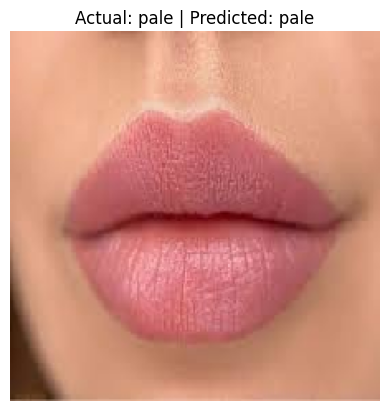

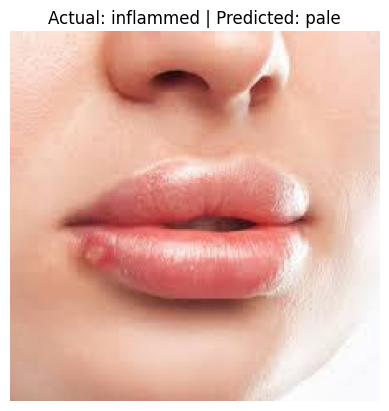

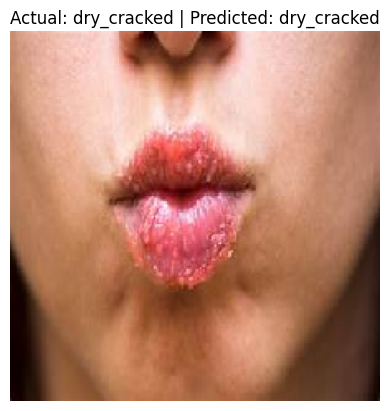

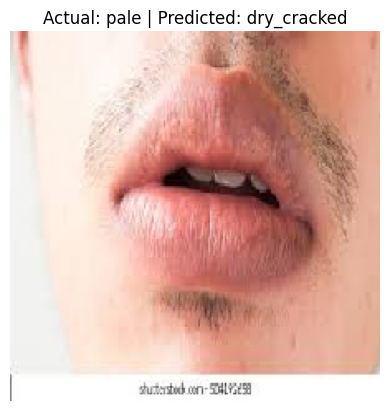

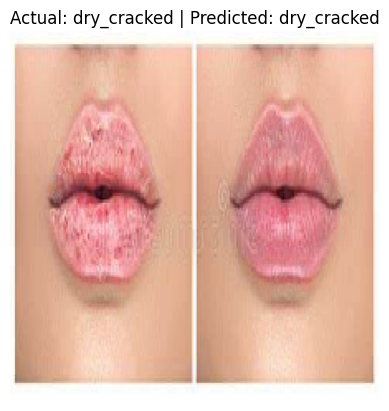

In [5]:
import numpy as np
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Step 1: Get the file paths of all images in the test set
all_image_paths = test_generator.filepaths

# Step 2: Randomly select 5 image paths
sample_image_paths = random.sample(all_image_paths, 5)

# Step 3: Preprocess the images (same preprocessing as during training)
sample_images = []
true_classes = []
for img_path in sample_image_paths:
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match input shape
    img_array = image.img_to_array(img) / 255.0  # Rescale the image
    sample_images.append(img_array)
    
    # Get the true class (from the test generator)
    true_class = test_generator.class_indices[img_path.split("\\")[-2]]  # Extract class from the folder structure
    true_classes.append(true_class)

sample_images = np.array(sample_images)

# Step 4: Make predictions
predictions = model.predict(sample_images)

# Step 5: Convert predictions to class labels
predicted_classes = tf.argmax(predictions, axis=-1).numpy()

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Step 6: Display actual and predicted labels for each image
for i, img_path in enumerate(sample_image_paths):
    img = image.load_img(img_path, target_size=(224, 224))  # Load original image for display
    plt.imshow(img)
    plt.title(f"Actual: {class_labels[true_classes[i]]} | Predicted: {class_labels[predicted_classes[i]]}")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


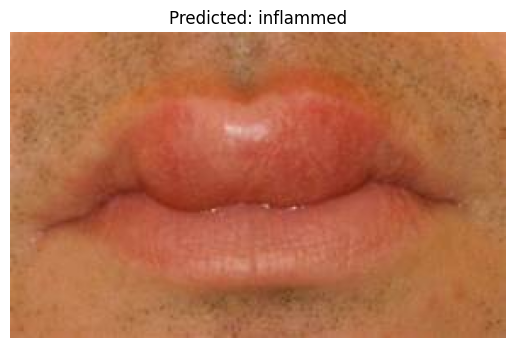

Prediction Probabilities: [[0.05251896 0.67810786 0.26937312]]


In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Step 1: Load the saved model
model_path = 'annmobilenet_best_model.h5'  # Path to your saved model
model = load_model(model_path)

# Step 2: Preprocess the image
def preprocess_single_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)  # Load and resize the image
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match the model input
    return img_array

# Step 3: Predict the class
def predict_image(img_path, model, class_labels):
    preprocessed_image = preprocess_single_image(img_path)
    predictions = model.predict(preprocessed_image)
    predicted_class = tf.argmax(predictions, axis=-1).numpy()[0]
    return predicted_class, predictions

# Step 4: Display the image and the predicted class
def display_prediction(img_path, predicted_class, class_labels):
    img = image.load_img(img_path)  # Load the original image for display
    plt.imshow(img)
    plt.title(f"Predicted: {class_labels[predicted_class]}")
    plt.axis('off')
    plt.show()

# Class labels (replace with your actual class names)
class_labels = ["dry_cracked", "inflammed", "pale"]

# Step 5: Predict and display the result
image_path = "C:/Users/kaush/Downloads/th (4).jpg"  # Replace with the path to your image
predicted_class, predictions = predict_image(image_path, model, class_labels)
display_prediction(image_path, predicted_class, class_labels)

# Optionally, print the raw prediction probabilities
print("Prediction Probabilities:", predictions)


In [4]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define class names
class_names = ["dry_cracked", "inflammed", "pale"]

# Path to the augmented training directory
image_dir = r"C:\Users\kaush\Downloads\lips\lips\augmented_train"

# Load and preprocess the images
def load_images_from_directory(image_dir, class_names, img_size=(224, 224)):
    images = []
    labels = []
    original_images = []  # List to store original images for comparison

    for idx, class_name in enumerate(class_names):
        class_folder = os.path.join(image_dir, class_name)
        if not os.path.exists(class_folder):
            print(f"Directory not found: {class_folder}")
            continue

        for img_file in os.listdir(class_folder):
            if img_file.endswith(".jpg"):
                img_path = os.path.join(class_folder, img_file)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path)
                    img_array = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to array

                    # Resize the image to the target size
                    img_resized = tf.image.resize(img_array, img_size)
                    original_images.append(img_array)  # Store the original image (before resizing)

                    img_resized = img_resized / 255.0  # Normalize image to [0, 1]
                    images.append(img_resized)
                    labels.append(idx)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")

    return np.array(images), np.array(labels), np.array(original_images)

# Load the data
images, labels, original_images = load_images_from_directory(image_dir, class_names)

# Display one original image and its preprocessed version
def display_one_image_before_after(original_images, images, labels, class_names):
    # Select the first image from the dataset for demonstration
    idx = 0

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Show original image
    axes[0].imshow(original_images[idx].astype(np.uint8))
    axes[0].set_title(f"Original: {class_names[labels[idx]]}")
    axes[0].axis('off')

    # Show preprocessed image
    axes[1].imshow(images[idx])
    axes[1].set_title(f"Preprocessed: {class_names[labels[idx]]}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

# Check if images and labels are loaded successfully
if len(images) > 0 and len(labels) > 0:
    display_one_image_before_after(original_images, images, labels, class_names)
else:
    print("No images were loaded. Please check the directory path and data.")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (597,) + inhomogeneous part.